# Exploratory Data Analysis using PCA

## Dimensionality reduction

In this part, you will investigate a few strategies for reducing dimensionality while preserving as much of the variation (information) expressed by the data as possible/practical. In this notebook, you will consider two techniques: 

- Variance Thresholding
- Principal Component Analysis (after doing the specific PCA notebook)

Let's start by loading the usual libraries and the data saved at the end of the previous step. Note that we only have numerical variables here, we could have also loaded the "countries" variable but we won't consider it here. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

customers = pd.read_csv("data/retail_data_postfeng.csv", index_col="CustomerID")
countries = pd.read_csv("data/retail_data_countries.csv", index_col="CustomerID")

### Variance thresholding

Variance thresholding is a simple approach that removes features with low variance. 
Importantly, this thresholding does not take any classification into account, so we are examining the variance for a given feature across samples, not the variance relative to any output or class.

Variance thresholding is implemented as a transformer object in `scikit-learn` with a number of different options.

* Join the `countries` dataframe corresponding to the one-hot encoding to the `customers` dataframe
* create an object of the `VarianceThreshold` class from `sklearn.feature_selection` to select the subset of features with variance of at least `0.5`
* run the `fit()` method on the object, you can then use the `get_support()` method to see an array of True/False for which columns pass the threshold

In [2]:
# add your code here to load VarianceThreshold and join the dataframes
from sklearn.feature_selection import VarianceThreshold

# joining the dataframes
customers = customers.join(countries)

# add your code to create an instance of VarianceThreshold and fit it to customers
sel = VarianceThreshold(threshold=0.5)
sel.fit(customers)

# retrieve and display the columns that do not go through the filter
columns_to_keep = sel.get_support()

print(customers.columns[~columns_to_keep]) # columns that will in fact be removed


Index(['Austria', 'Belgium', 'Finland', 'France', 'Germany', 'Italy', 'Norway',
       'Portugal', 'Spain', 'Switzerland', 'United Kingdom'],
      dtype='object')


*Which features would be removed based on this strategy?
What are the drawbacks of this method?*

Other methods for variance thresholding (including ones that use correlation with the class(es) of interest) are available, you can read more on this [in the sklearn documentation](http://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold).

## Principal Component Analysis

(*make sure you've done the PCA notebook first and then come back here*)

Principal Component Analysis (PCA) is a technique for dimensionality reduction, data compression and feature extraction. 
The PCA algorithm transform the initial features into an equivalent set of orthogonal (uncorrelated) features known as the Principal Components (PCs). 
Taking the first few PCs ranked by order of importance can be enough to explain most of the information carried by the data. 

### Apply PCA in the input data using scikit-learn

In scikit-learn, PCA is implemented as a transformer object that learns `n` components in its `fit()` method, and can be used on new data to project it on these components. 
More information on can be found [in the sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Import the PCA class from `sklearn.decomposition`, create a PCA instance without specifying the number of components and fit it on the data

In [3]:
# add your code here
# Initialise the PCA object and create an index for each Principal Component
from sklearn.decomposition import PCA
pca = PCA()


Apply the PCA on the `customers` dataframe using the `fit_transform()` method this is what we referred to as the `X\rightarrow X'` transformation. 

* apply the `fit_transform()` method on the dataframe corresponding to the customers
* put the results in a dataframe, the index should correspond to that of the original dataframe and the column names should be `PC1`, `PC2`, ... (use a list comprehension for this)
* print the shape of the new dataframe, does it match what you would have expected?

In [4]:
# your code here
customers_pca = pd.DataFrame(
                        pca.fit_transform(customers), 
                        columns = ['PC'+str(i+1) for i in range(customers.shape[1])], 
                        index   = customers.index
                        )
print(customers_pca.shape)


(3126, 21)


### Calculate and plot the explained and cumulative variance 

How much information do you lose by taking only the first few components? 

You can visualise this by looking at the *explained variance*. 
The explained variance indices the proportion of the variance of the original data explained by each successive PCs. 

Equivalently, you can look at the *cumulative variance* which illustrates the overall amount of variance explained by taking up to `k` components. 

* create a vector corresponding to the explained variance for each PC by considering the `explained_variance_ratio_` attribute of the PCA object
* compute the cumulative variance out of the sequence of explained variances
* put both in a dataframe and have a look then plot it as a barplot with seaborn.

In [5]:
# add your code here to compute the explained and cumulative variance

# Calculate the explained variance
exp_var = [i*100 for i in pca.explained_variance_ratio_]

# Calculate the cumulative variance
cum_var = np.cumsum(pca.explained_variance_ratio_*100)

# Combine both in a data frame
pca_var = pd.DataFrame(data={'Explained Var': exp_var, 'Cumulative Var': cum_var})
pca_var.head(5)


,Explained Var,Cumulative Var
0,50.517307,50.517307
1,18.818963,69.336270
2,13.998006,83.334276
3,6.218085,89.552361
4,3.875741,93.428103


[Text(0,0.5,'Cumulative Variance'), Text(0.5,0,'Principal Components')]

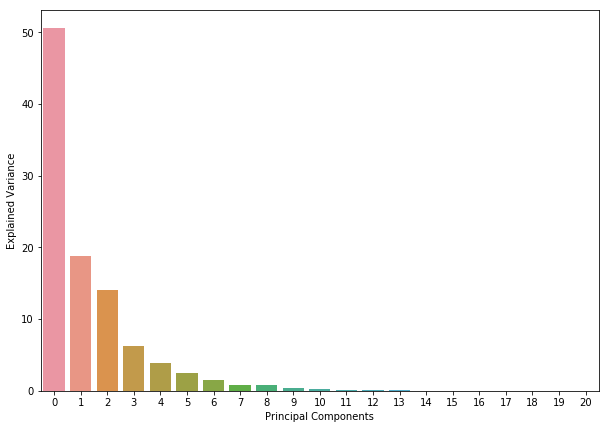

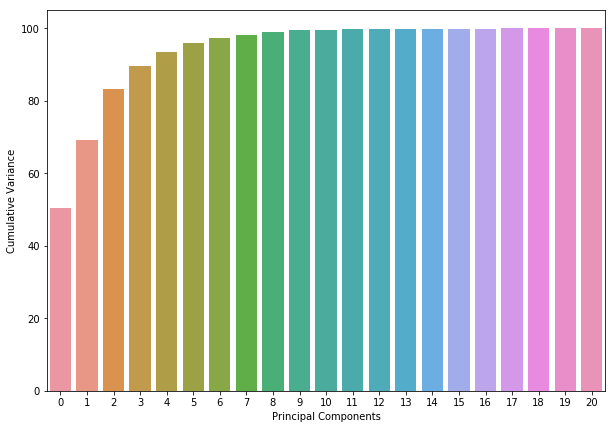

In [6]:
# add your code here to display both the explained and cumulative variance
fig = plt.figure(figsize=(10,7))

ax = sns.barplot(
        x = pca_var.index, 
        y = 'Explained Var',  data = pca_var )
ax.set(
        xlabel = 'Principal Components', 
        ylabel = 'Explained Variance' )

fig = plt.figure(figsize=(10,7))

ax = sns.barplot(
        x = pca_var.index, 
        y = 'Cumulative Var',  data = pca_var )
ax.set(
        xlabel = 'Principal Components', 
        ylabel = 'Cumulative Variance' )


### Plot the PCA loadings using a heatmap

Each Principal Component is a linear combination of the original variables. It is possible to visualise this by showing a `heatmap` of the "loadings". Let's take the first principal component for example, we can write:

$\text{PC}_1 = \alpha_{11} X_{:1} + \alpha_{12} X_{:2} + \dots + \alpha_{1p} X_{:p}$

the coefficients $\alpha_{1i}$ are the loadings. They give an indication of the "importance" of each of the original feature (column).

In the PCA object, the loadings correspond to the `components_` attribute. 

* create a dataframe called `loadings` that takes the components as data
* make sure to have the appropriate `columns` and `index` specified!

In [7]:
# add your code here
# Create the PCA loadings matrix and show the loadings
loadings = pd.DataFrame(pca.components_, 
                        columns = customers.columns,
                        index   = customers_pca.columns)


* get the loadings
* use the `heatmap` function of seaborn to show the `loadings` (transpose the results to make the matrix more readable)
* check the documentation of the function to make the whole graph prettier

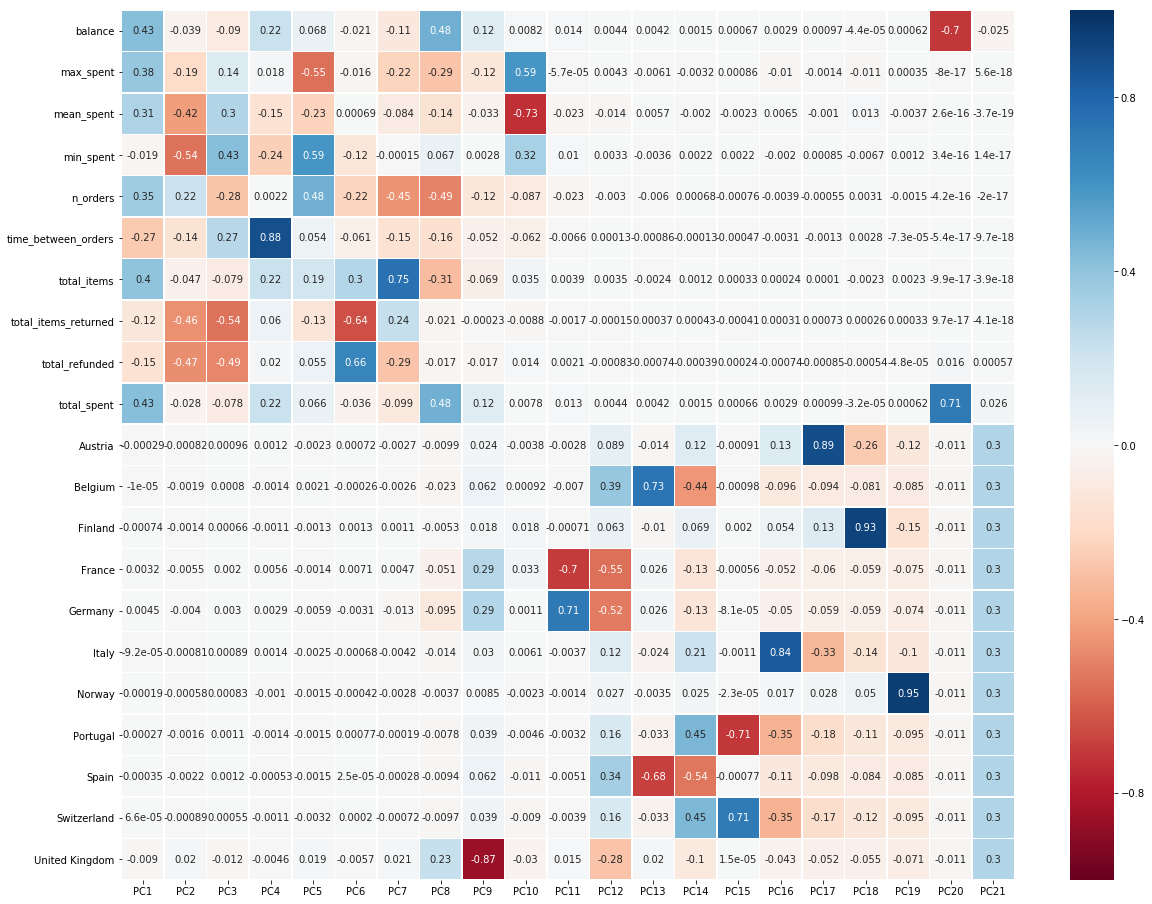

In [8]:
# add your code here
plt.figure(figsize=(20, 16))
sns.heatmap(
        loadings.transpose(), 
        linewidths=0.5, 
        cmap="RdBu", 
        vmin=-1, vmax=1, annot=True )


We can use this heatmap to see how the different features load onto the different components. 
In real life scenarios, these components can often be attributed to higher level concepts with respect to the features (e.g. length, breadth, height might form a "size" component) or domain-specific constructs.

### Create a scatterplot of the first two PCs and interpret
Often PCA scores plots are used in the hope that they will reveal clusters, trends and patterns in the data.Create a scatterplot using lmplot of seaborn of the first two principal components (scores of PC1 and PC2) and discuss what you see

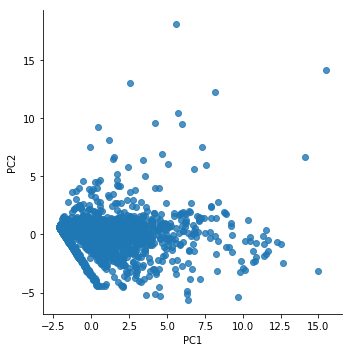

In [9]:
# add your code here
sns.lmplot(x='PC1', y='PC2', data=customers_pca, fit_reg=False)
